In [1]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [3]:
(trainx, trainy), (testx, testy)  = mnist.load_data()

In [4]:
import matplotlib.pyplot as plt 

In [5]:
trainx = trainx/255
testx = testx/255
testx = testx.reshape(10000, 28, 28, 1)
trainx = trainx.reshape(60000, 28, 28, 1)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(30, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [8]:
from keras.utils import to_categorical

trainy = to_categorical(trainy)
testy = to_categorical(testy)


In [9]:
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
his = model.fit(trainx, trainy, validation_data=(testx, testy), epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 38s 76ms/step - loss: 0.3604 - accuracy: 0.8920 - val_loss: 0.1224 - val_accuracy: 0.9619
Epoch 2/10
469/469 [==============================] - 34s 72ms/step - loss: 0.1062 - accuracy: 0.9686 - val_loss: 0.0760 - val_accuracy: 0.9764
Epoch 3/10
469/469 [==============================] - 49s 104ms/step - loss: 0.0750 - accuracy: 0.9772 - val_loss: 0.0636 - val_accuracy: 0.9806
Epoch 4/10
469/469 [==============================] - 33s 71ms/step - loss: 0.0617 - accuracy: 0.9808 - val_loss: 0.0688 - val_accuracy: 0.9785
Epoch 5/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0514 - accuracy: 0.9846 - val_loss: 0.0516 - val_accuracy: 0.9850
Epoch 6/10
469/469 [==============================] - 33s 70ms/step - loss: 0.0423 - accuracy: 0.9870 - val_loss: 0.0489 - val_accuracy: 0.9860
Epoch 7/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0358 - accuracy: 0.9885 - val_loss: 0.0487 - val_accuracy

In [17]:
import pickle as pkl 

In [10]:
model.save('model.h5')

In [11]:
new_model = tf.keras.models.load_model('model.h5')


In [12]:
outputx = new_model.predict(trainx)

1875/1875 [==============================] - 14s 7ms/step


In [15]:
his.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

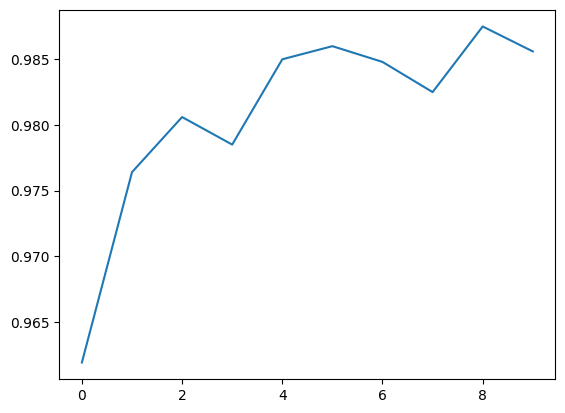

In [16]:
import matplotlib.pyplot as plt 

plt.plot(his.history['val_accuracy'])

In [15]:
outputx.shape

(60000, 10)

In [28]:
trainy[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [29]:
outputx[1]

array([1.0000000e+00, 7.6915335e-13, 1.4514082e-14, 9.3674203e-19,
       9.1030086e-11, 1.7641406e-14, 6.3466142e-11, 4.0843092e-14,
       2.7844350e-13, 4.4263959e-10], dtype=float32)